In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

# Classification
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import LogisticRegression
#import xgboost as xgb

from descriptor_model import DescriptorModel, plot_two_scales_y

## Load data 
and save them in a DataFrame

In [2]:
descr = DescriptorModel("./data/out_O2_taub.csv")

100 simulations with 36 values loaded


In [3]:
descr.df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,4,0.004520,0.003805,0.002963,0.003026,0.002770,0.002742,0.002827,0.002870,0.002844,...,0.003751,0.004329,0.003070,0.003132,0.003106,0.002617,0.003351,0.003112,0.003108,0.003107
1,5,0.004541,0.003759,0.003020,0.003029,0.002728,0.002754,0.002825,0.002839,0.002919,...,0.003731,0.004335,0.003094,0.003092,0.003097,0.002671,0.003345,0.003046,0.003043,0.003067
2,6,0.004524,0.003765,0.003001,0.002971,0.002779,0.002781,0.002839,0.002847,0.002808,...,0.003808,0.004420,0.003080,0.003134,0.003111,0.002617,0.003403,0.003071,0.003081,0.003097
3,7,0.004571,0.003769,0.002993,0.003043,0.002756,0.002772,0.002835,0.002866,0.002869,...,0.003824,0.004414,0.003105,0.003093,0.003101,0.002660,0.003378,0.003066,0.003081,0.003105
4,8,0.004488,0.003756,0.003018,0.003049,0.002769,0.002768,0.002879,0.002858,0.002880,...,0.003802,0.004394,0.003112,0.003090,0.003137,0.002673,0.003342,0.003071,0.003125,0.003078


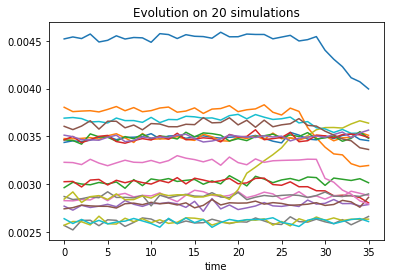

In [4]:
descr.plot_some_simulations(20)

# Processing X data and compute the accident variable Y

### Set the parameters:
* **len_X**: the len_x last values of X are taken into account to compute descriptors
* **tau**: We want to predict if an accident happens at t + tau

The following variables are used to determine the event: "accident" that we want to predict:
* **thres_mean**: If |mean(X(0), ..., (t-1)) - X(t)| < thres_mean, then there is an accident at t.
* **X0_base, thres_gal**: If |X(t) - X0| < thres_gal then there is an accident.

In [5]:
params = {'thres_mean': 1e-4,
          'X0_base': 0.0042,
          'thres_gal': 0.2}

In [6]:
descr.process_var(params)

print("len(Y == 1) : {}, len(Y == 0) : {}".format(descr.data['Y'].sum(), len(descr.data) - descr.data['Y'].sum()))

print("{}% of the points are an accident".format(round(np.sum(descr.data['Y'])/ len(descr.data) * 100, 2)))
print("{} patients over the {} patients have an accident".format(len(descr.data[descr.data['Y'] == 1]['trajec'].unique()), descr.nb_sim))

descr.data.head()

len(Y == 1) : 433, len(Y == 0) : 3167
12.03% of the points are an accident
40 patients over the 100 patients have an accident


,X,X_cummean,trajec,X_diff,Y1,Y2,Y
0,0.004520,0.004520,0,0.000000,0,0,0
1,0.004541,0.004520,0,0.000021,0,0,0
2,0.004524,0.004531,0,0.000007,0,0,0
3,0.004571,0.004529,0,0.000043,0,0,0
4,0.004488,0.004539,0,0.000051,0,0,0


* **trajec** is the number of the trajectory. When the number change, the value correspond to a new person.

In [7]:
trajec_with_accident = np.unique(descr.data[descr.data['Y'] == 1]['trajec'])

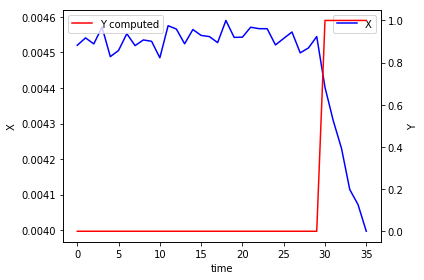

In [8]:
plot_two_scales_y(descr.data[descr.data['trajec'] == trajec_with_accident[0]]['X'],
                  descr.data[descr.data['trajec'] == trajec_with_accident[0]]['Y'],
                  title='', x_label='time', y_label1='X', y_label2='Y',
                  label1='X', label2='Y computed')

## Compute descriptors on X data

In [9]:
descr.compute_descriptors(tau=5, len_X=10)

The descriptors computed are: ['mean', 'diff_to_mean', 'diff_first_second_mean', 'diff_to_X0', 'actual_evolution', 'past_evolution', 'mean_past_evolution', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10']
100 trajectories of length 36


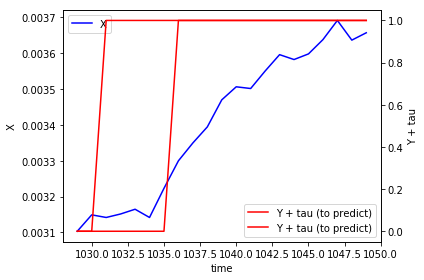

In [51]:
plot_two_scales_y(descr.descriptors[descr.descriptors['trajec'] == trajec_with_accident[15]]['X'],
                  descr.descriptors[descr.descriptors['trajec'] == trajec_with_accident[15]][['Y_to_predict', 'Y']],
                  title='', x_label='time', y_label1='X', y_label2='Y + tau',
                  label1='X', label2='Y + tau (to predict)')

### Correlation coefficients

In [11]:
names = [x for x in descr.name_descriptors if x[:2] != 'X_'] + ['Y', 'Y_to_predict']

print("Correlation coefficients between the variables:")
descr.descriptors[names].corr()

Correlation coefficients between the variables:


,mean,diff_to_mean,diff_first_second_mean,diff_to_X0,actual_evolution,mean_past_evolution,Y,Y_to_predict
mean,1.000000,0.134704,0.096846,-0.952739,-0.125342,-0.127570,0.086815,0.106578
diff_to_mean,0.134704,1.000000,0.839924,-0.156952,-0.128706,-0.277525,0.812988,0.600147
diff_first_second_mean,0.096846,0.839924,1.000000,-0.131517,-0.060220,-0.306913,0.697307,0.499156
diff_to_X0,-0.952739,-0.156952,-0.131517,1.000000,0.117368,0.128929,-0.119507,-0.130440
actual_evolution,-0.125342,-0.128706,-0.060220,0.117368,1.000000,0.226221,-0.042202,-0.027539
mean_past_evolution,-0.127570,-0.277525,-0.306913,0.128929,0.226221,1.000000,-0.053589,-0.049211
Y,0.086815,0.812988,0.697307,-0.119507,-0.042202,-0.053589,1.000000,0.714796
Y_to_predict,0.106578,0.600147,0.499156,-0.130440,-0.027539,-0.049211,0.714796,1.000000


**Remarques:**
La variable à prédire Y est fortement corrélées avec les deux variables decrivant la différence à la moyenne passée ('diff_to_mean', 'diff_first_second_mean'). Ces deux variables sont aussi corrélées, il vaut mieux choisir l'une des deux.

# PREDICTION

In [12]:
from prediction_model import PredictionModel

In [13]:
print("Available descriptors:", descr.name_descriptors)

Available descriptors: ['mean', 'diff_to_mean', 'diff_first_second_mean', 'diff_to_X0', 'actual_evolution', 'past_evolution', 'mean_past_evolution', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10']


In [14]:
model = PredictionModel(descr.descriptors, tau=5, adjust_classes=False)

list_descriptors = ['X', 'diff_to_mean']
model.set_train_test_by_patient(list_descriptors, 0.4)

tree_classif = tree.DecisionTreeClassifier()
_, _ = model.test_classif_model(tree_classif, print_results=True)

prediction = model.compute_metrics(tree.DecisionTreeClassifier())
model.analyze_prediction(prediction, True)

40 patients in the test set and 60 in the train set
Score on train set: 100.0%
Score on test set: 98.929%

-- METRICS --
Nb of patients having an accident: 19
10.53% of them (2 patients) have been detected before the accident
0.0% of the detected accident where detected at tau (=5), 0.0% is advance and 100.0% with delay
0.0% of the detected accident where detected at tau (=5), 0.0% is advance and 100.0% with delay
The average delay is 3.5, and the average advance is nan


{'avg_advance': nan,
 'avg_delay': 3.5,
 'nb_accident': 19,
 'nb_advance': 0,
 'nb_delay': 2,
 'nb_ok': 0,
 'nb_prediction': 2}

In [15]:
prediction[prediction['accident_tau']]

,accident,accident_tau,id_patient,prediction,prediction_delay,time_of_accident,time_of_accident_tau,time_of_prediction
0,True,True,0,False,NaN,20.0,15.0,20.0
1,True,True,1,False,NaN,18.0,13.0,18.0
3,False,True,3,False,NaN,NaN,16.0,NaN
8,True,True,20,False,NaN,20.0,15.0,NaN
14,True,True,32,False,NaN,11.0,6.0,11.0
16,True,True,40,False,NaN,9.0,4.0,9.0
20,True,True,49,False,NaN,7.0,2.0,7.0
23,True,True,54,False,NaN,20.0,15.0,NaN
25,True,True,59,True,3.0,19.0,14.0,17.0
26,True,True,69,False,NaN,13.0,8.0,13.0


In [16]:
prediction[prediction['prediction_delay'] < 5]['prediction_delay']

25    3.0
28    4.0
Name: prediction_delay, dtype: float64

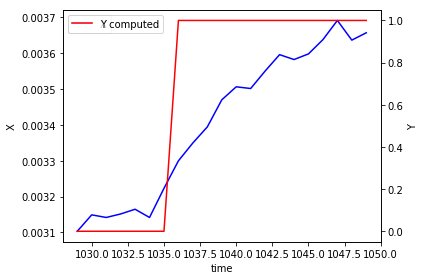

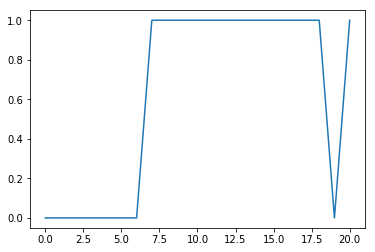

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [17]:
n = 49
plot_two_scales_y(model.descr[model.descr['trajec'] == n]['X'],
                  model.descr[model.descr['trajec'] == n]['Y'],
                  title='', x_label='time', y_label1='X', y_label2='Y',
                  label1='X', label2='Y computed')

y_predict = model.regr_model.predict(model.descr[model.descr['trajec'] == n][list_descriptors])
plt.plot(y_predict)
plt.show()

y_predict

In [18]:
model = PredictionModel(descr.descriptors, True)

The classes have been adjusted, there is now 247 data in each class


#### Choose descriptors

In [19]:
print("Available descriptors:", descr.name_descriptors)

Available descriptors: ['mean', 'diff_to_mean', 'diff_first_second_mean', 'diff_to_X0', 'actual_evolution', 'past_evolution', 'mean_past_evolution', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10']


In [20]:
# Choose a list of descriptors:
list_descriptors = ['diff_to_mean', 'X']

#### Separate data in test and train set randomly

In [21]:
model.set_train_test_dataset_rand(list_descriptors, 0.2)

98 data in the test set and 396 in the train set


In [22]:
model.X_train.shape, model.Y_train.shape

((396, 2), (396,))

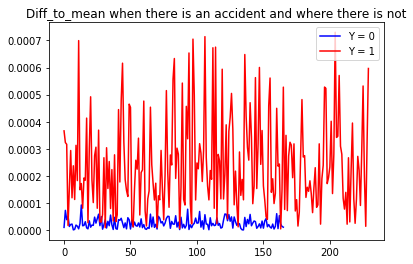

In [23]:
plt.plot(model.X_train[model.Y_train == 0][:, 0], color='b', label='Y = 0')
plt.plot(model.X_train[model.Y_train == 1][:, 0], color='r', label="Y = 1")
plt.legend()
plt.title('Diff_to_mean when there is an accident and where there is not')
plt.show()

## Test several classifiers

In [24]:
# Classification using a SVM (Support Vector Machine)
print("-- Linear SVM --")
lin_clf = svm.SVC()
_, _ = model.test_classif_model(lin_clf, print_results=True)

print("-- Logistic Regression --")
logreg = LogisticRegression()
_, _ = model.test_classif_model(logreg, print_results=True)

print("-- Trees --")
TreeClassif = tree.DecisionTreeClassifier()
_, _ = model.test_classif_model(TreeClassif, print_results=True)

-- Linear SVM --
Score on train set: 58.081%
Score on test set: 51.02%
-- Logistic Regression --
Score on train set: 58.081%
Score on test set: 51.02%
-- Trees --
Score on train set: 100.0%
Score on test set: 84.694%


In [25]:
TreeClassif

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Compute metrics on patient

In [26]:
model = PredictionModel(descr.descriptors, False)
model.set_train_test_by_patient(0.5)

The classes have been adjusted, there is now 247 data in each class
To do training by patient do not adjust the classes. Load new data without adjusting the classes


# All pipeline

In [31]:
def test_tau(tau, len_X=10):
    params = {'thres_mean': 1e-4,
          'X0_base': 0.0042,
          'thres_gal': 0.2}
    descr = DescriptorModel("./data/out_O2_taub.csv")
    descr.process_var(params)
    descr.compute_descriptors(tau, len_X=10)
    
    model = PredictionModel(descr.descriptors, tau, adjust_classes=False)
    
    list_descriptors = ['X', 'diff_to_mean']
    model.set_train_test_by_patient(list_descriptors, 0.4)
    prediction = model.compute_metrics(tree.DecisionTreeClassifier())
    results = model.analyze_prediction(prediction)
    return results, prediction

In [32]:
results, prediction = test_tau(tau=2)
results

100 simulations with 36 values loaded
The descriptors computed are: ['mean', 'diff_to_mean', 'diff_first_second_mean', 'diff_to_X0', 'actual_evolution', 'past_evolution', 'mean_past_evolution', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10']
100 trajectories of length 36
40 patients in the test set and 60 in the train set


{'avg_advance': 1.0,
 'avg_delay': 1.0,
 'nb_accident': 17,
 'nb_advance': 2,
 'nb_delay': 3,
 'nb_ok': 0,
 'nb_prediction': 5}

In [29]:
results, prediction = test_tau(tau=3)
results

100 simulations with 36 values loaded
The descriptors computed are: ['mean', 'diff_to_mean', 'diff_first_second_mean', 'diff_to_X0', 'actual_evolution', 'past_evolution', 'mean_past_evolution', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10']
100 trajectories of length 36
40 patients in the test set and 60 in the train set


{'avg_advance': 7.428571428571429,
 'avg_delay': nan,
 'nb_accident': 17,
 'nb_advance': 7,
 'nb_delay': 0,
 'nb_ok': 0,
 'nb_prediction': 7}

In [30]:
results, prediction = test_tau(tau=1)
results

100 simulations with 36 values loaded
The descriptors computed are: ['mean', 'diff_to_mean', 'diff_first_second_mean', 'diff_to_X0', 'actual_evolution', 'past_evolution', 'mean_past_evolution', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10']
100 trajectories of length 36
40 patients in the test set and 60 in the train set


{'avg_advance': 6.125,
 'avg_delay': nan,
 'nb_accident': 18,
 'nb_advance': 8,
 'nb_delay': 0,
 'nb_ok': 2,
 'nb_prediction': 10}